In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ghibtools as gh
import pandas as pd
import seaborn as sns
import pingouin as pg
from params import *
from bibliotheque import *
from configuration import base_folder
import os

In [3]:
save_folder = base_folder / 'Figures' / 'stimulus_scoring'

In [4]:
concat = []
for participant in subject_keys:
    ses01_folder = base_folder / 'Data' / f'{participant}' / 'questionnaires' / 'ses01'
    df_participant = pd.read_excel(ses01_folder / f'cotations_odeurs_absolues_{participant}.xlsx')
    concat.append(df_participant)
cotations_absolues_odeurs = pd.concat(concat)

In [5]:
concat = []
for participant in subject_keys:
    ses01_folder = base_folder / 'Data' / f'{participant}' / 'questionnaires' / 'ses01'
    df_participant = pd.read_excel(ses01_folder / f'cotations_musiques_absolues_{participant}.xlsx')
    concat.append(df_participant)
cotations_absolues_musiques = pd.concat(concat)

In [6]:
cotations_absolues_odeurs

,participant,odeur_num,odeur_label,odeur_name,hédonicité_absolue_brute,longueur_totale,hédonicité_absolue
0,P01,1,FO,Feuille d'Olivier,74,100,0.74
1,P01,2,FP,Floral Printanier,85,100,0.85
2,P01,3,R,Rose,26,100,0.26
3,P01,4,PL,Pêche Lavande,40,100,0.40
4,P01,5,FoE,Fleur d'oranger épicé,77,100,0.77
...,...,...,...,...,...,...,...
5,P31,6,FC,Fleur de coton,85,100,0.85
6,P31,7,V,Vanille,92,100,0.92
7,P31,8,BO,Blue Ocean,77,100,0.77
8,P31,9,BE,Bois épicé,57,100,0.57


In [7]:
cotations_absolues_musiques

,participant,musique_num,musique_name,appréciation_absolue,longueur_totale,appréciation_absolue_normalisée,hédonicité_absolue_brute,hédonicité_absolue
0,P01,1,Classic,89.0,150,0.593333,NaN,NaN
1,P01,2,Electro,88.0,150,0.586667,NaN,NaN
2,P01,3,Hard_Rock,5.0,150,0.033333,NaN,NaN
3,P01,4,Jazz,3.0,150,0.020000,NaN,NaN
4,P01,5,Metal,50.0,150,0.333333,NaN,NaN
...,...,...,...,...,...,...,...,...
5,P31,6,Pop,NaN,100,NaN,80.0,0.80
6,P31,7,Raga,NaN,100,NaN,29.0,0.92
7,P31,8,Rap_Freeze,NaN,100,NaN,89.0,0.89
8,P31,9,Rap_Luv,NaN,100,NaN,66.0,0.66


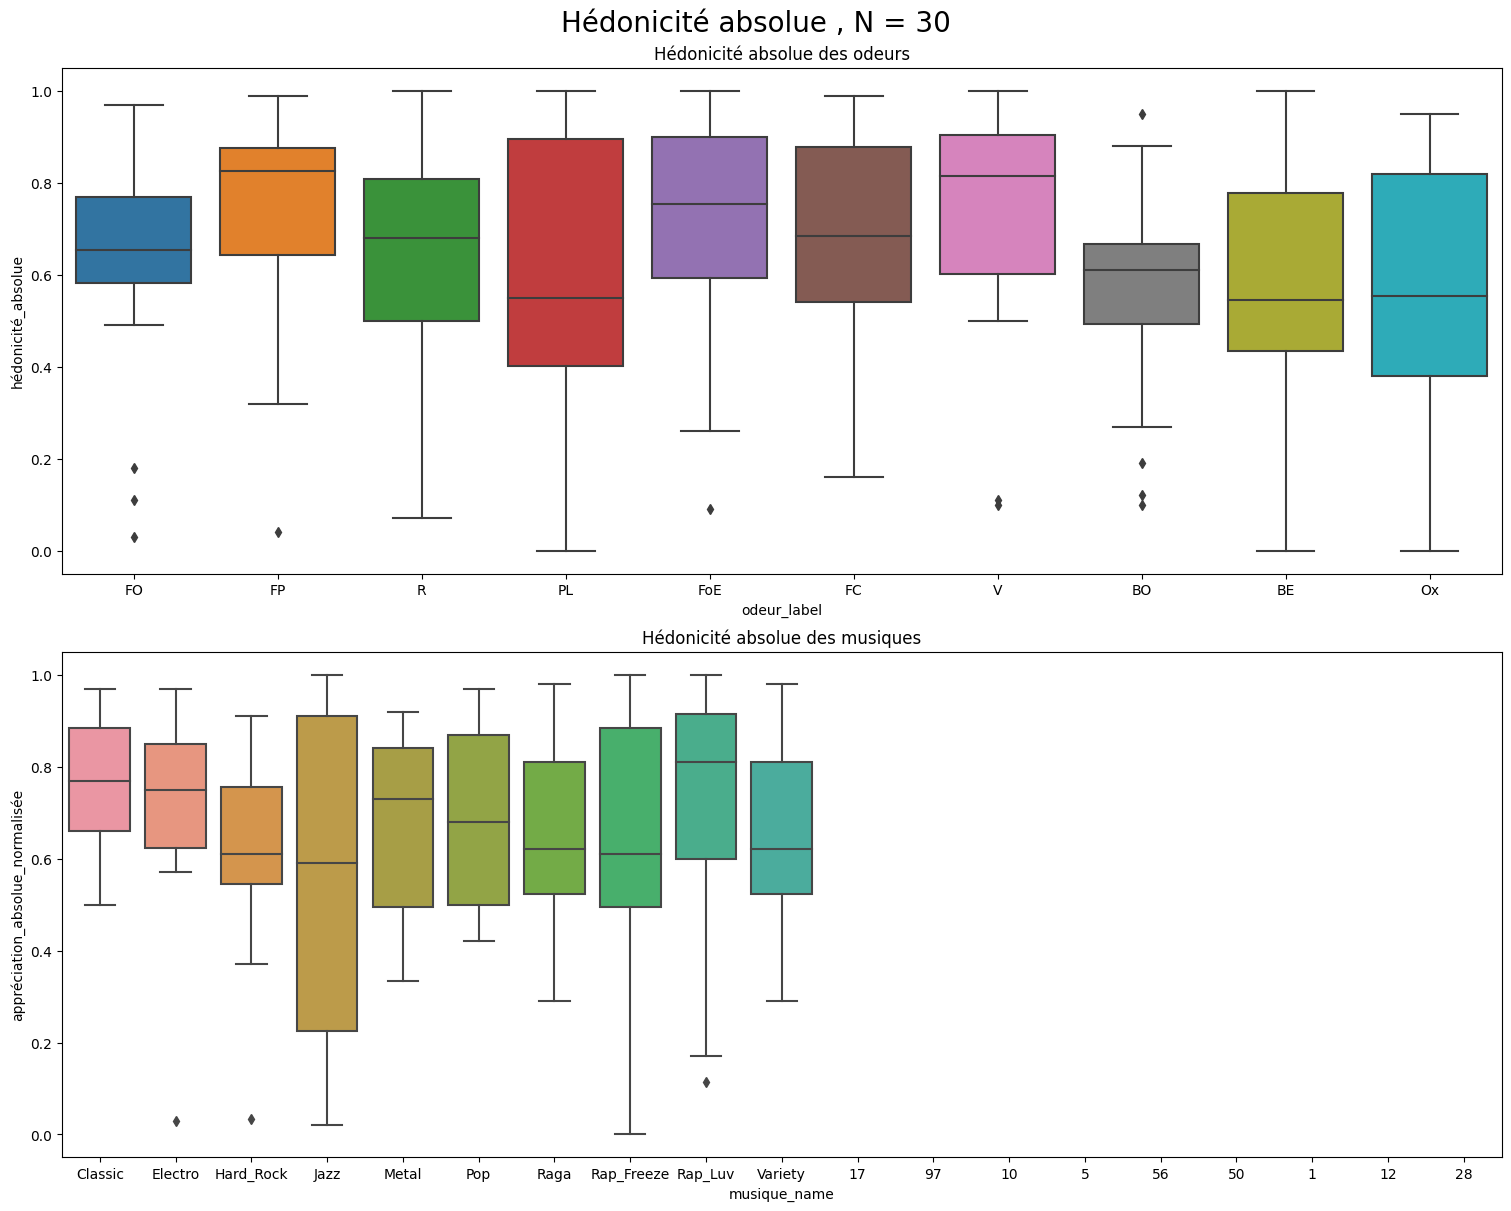

In [8]:
fig, axs = plt.subplots(nrows =2, figsize = (15,12), constrained_layout = True)

N = cotations_absolues_musiques['participant'].unique().size

fig.suptitle(f'Hédonicité absolue , N = {N}', fontsize = 20)

ax = axs[0]
sns.boxplot(data=cotations_absolues_odeurs, x='odeur_label', y = 'hédonicité_absolue', ax=ax)
ax.set_title('Hédonicité absolue des odeurs')

ax = axs[1]
sns.boxplot(data=cotations_absolues_musiques, x='musique_name', y = 'appréciation_absolue_normalisée', ax=ax)
ax.set_title('Hédonicité absolue des musiques')

file = save_folder / 'hédonicité_absolue.png'

fig.savefig(file, bbox_inches = 'tight')

In [9]:
concat = []
for participant in subject_keys:
    ses01_folder = base_folder / 'Data' / f'{participant}' / 'questionnaires' / 'ses01'
    df_participant = pd.read_excel(ses01_folder /  f'cotations_odeurs_relatives_{participant}.xlsx')
    concat.append(df_participant)
cotations_relatives_odeurs = pd.concat(concat)

In [10]:
concat = []
for participant in subject_keys:
    ses01_folder = base_folder / 'Data' / f'{participant}' / 'questionnaires' / 'ses01'
    df_participant = pd.read_excel(ses01_folder /  f'cotations_musiques_relatives_{participant}.xlsx')
    concat.append(df_participant)
cotations_relatives_musiques = pd.concat(concat)

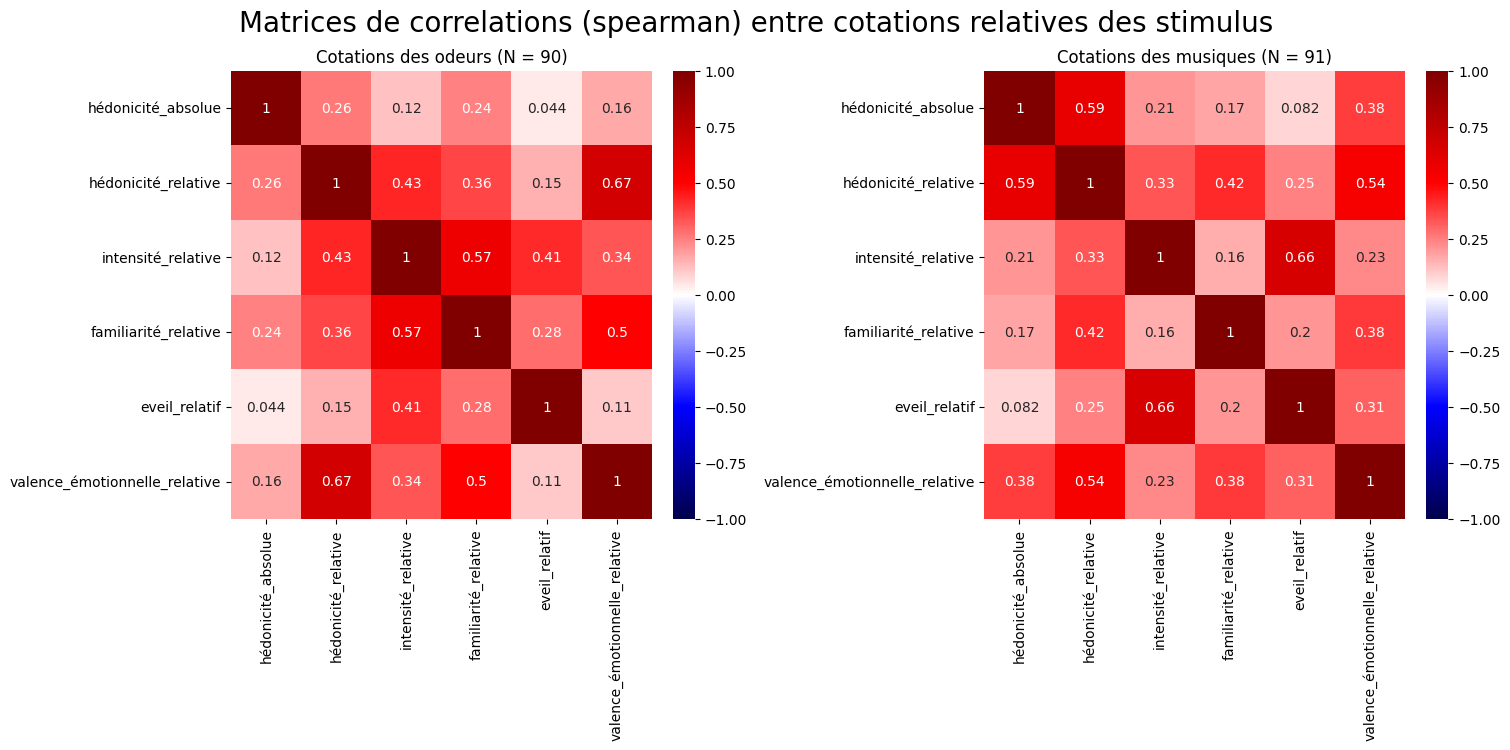

In [11]:
metrics = ['hédonicité_absolue','hédonicité_relative','intensité_relative','familiarité_relative','eveil_relatif','valence_émotionnelle_relative']
corr_method = 'spearman'

fig, axs = plt.subplots(ncols =2 , figsize = (15,7), constrained_layout = True)
fig.suptitle(f'Matrices de correlations ({corr_method}) entre cotations relatives des stimulus', fontsize = 20, y = 1.05)



ax = axs[0]
N = cotations_relatives_odeurs.shape[0]
sns.heatmap(cotations_relatives_odeurs.loc[:,metrics].corr(corr_method,numeric_only = True), cmap = 'seismic', vmin = -1, vmax =1, annot = True, ax=ax)
ax.set_title(f'Cotations des odeurs (N = {N})')

ax = axs[1]
N = cotations_relatives_musiques.shape[0]
sns.heatmap(cotations_relatives_musiques.loc[:,metrics].corr(corr_method,numeric_only = True), cmap = 'seismic', vmin = -1, vmax =1, annot = True, ax=ax)
ax.set_title(f'Cotations des musiques (N = {N})')

file = save_folder / f'matrice_correlation_{corr_method}.png'

fig.savefig(file, bbox_inches = 'tight')


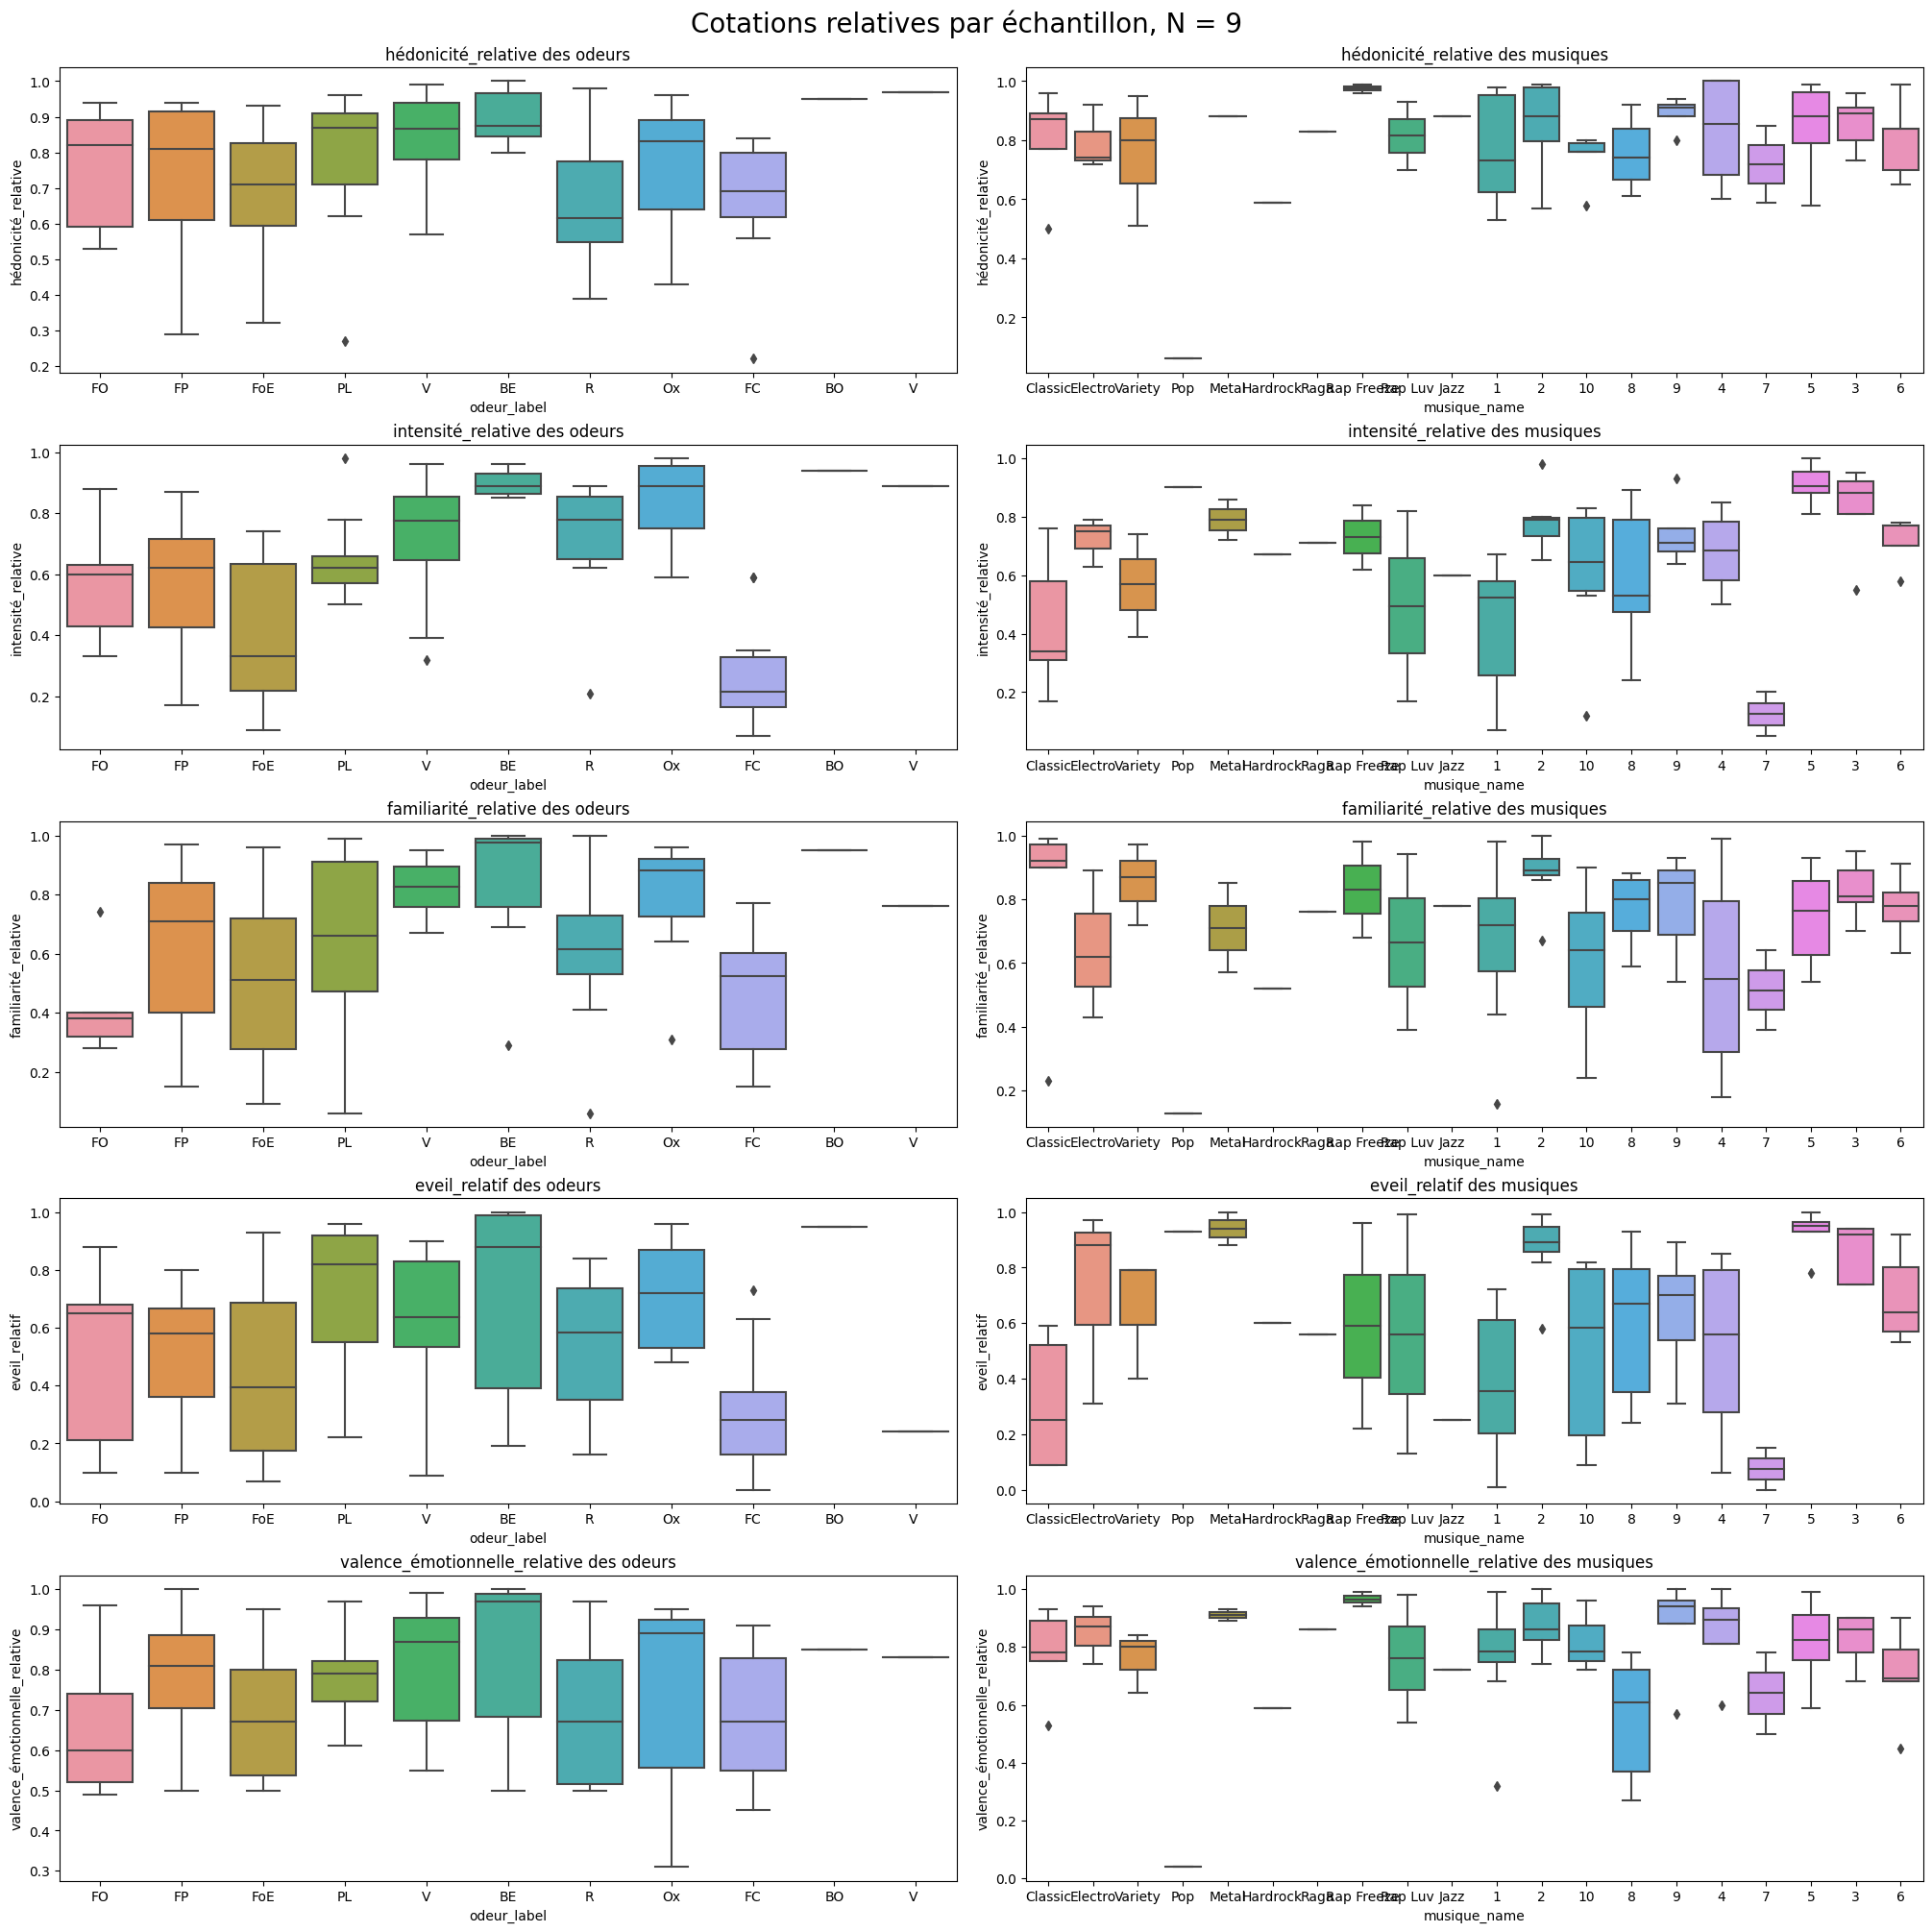

In [12]:
metrics = ['hédonicité_relative','intensité_relative','familiarité_relative','eveil_relatif','valence_émotionnelle_relative']

fig, axs = plt.subplots(nrows = len(metrics), ncols = 2, figsize = (20,20), constrained_layout = True)

N = cotations_relatives_odeurs['participant'].unique().size

fig.suptitle(f'Cotations relatives par échantillon, N = {N}', fontsize = 20)

for r, metric in enumerate(metrics):
    for c, cotations_relatives in enumerate([cotations_relatives_odeurs, cotations_relatives_musiques]):
        
        ax = axs[r,c]
        
        if c == 0:
            stim = 'odeurs'
            x_label = 'odeur_label'
        else:
            stim = 'musiques'
            x_label = 'musique_name'
        
        
            
        sns.boxplot(data=cotations_relatives, x=x_label, y = metric, ax=ax)
        ax.set_title(f'{metric} des {stim}')
        
file = save_folder / f'cotations_relatives_ses01.png'


fig.savefig(file, bbox_inches = 'tight')
